# **Exploratory Data Analysis (EDA) for Primary Dataset ("Cleaned-Movies-Primary.csv")**

**Initial Examination of Dataset**

In [13]:
import numpy as np
import pandas as pd
import chardet
import scipy.stats as stats

# Load the dataset
file_path = 'Cleaned-Movies-Primary.csv'

# Load the CSV file 
df = pd.read_csv(file_path)

# Display the overall "shape" of the dataset
df.shape



(3940, 13)

In [14]:
# Examine the dataset to identify columns with missing values and outliers.
# Display the first few rows of the pandas dataframe
print(df.head(15))

                                                Title  Year  \
0                         Patton Oswalt: Annihilation  2017   
1                                       New York Doll  2005   
2   Mickey's Magical Christmas: Snowed in at the H...  2001   
3                          Mickey's House of Villains  2001   
4                                       And Then I Go  2017   
5                            An Extremely Goofy Movie  2000   
6                                        Peter Rabbit  2018   
7                                          Love Songs  2007   
8                                                  89  2017   
9                                      The Foster Boy  2011   
10                                    Forever My Girl  2018   
11                            Tom Segura: Disgraceful  2018   
12      The Secret Rules of Modern Living: Algorithms  2015   
13                                Secrets in the Fall  2015   
14                                       Silent Night  

In [9]:
# Examine the structure of the data
print("Data Structure:")
print(df.info())
print("----------")
print("\n ")

# Examine the variables
print("Variables:")
print(df.columns)
print("----------")
print("\n ")

Data Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3940 entries, 0 to 3939
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            3940 non-null   object 
 1   Year             3940 non-null   int64  
 2   Summary          3935 non-null   object 
 3   Short Summary    3939 non-null   object 
 4   Genres           3940 non-null   object 
 5   IMDB ID          3940 non-null   int64  
 6   Runtime          3940 non-null   int64  
 7   YouTube Trailer  3893 non-null   object 
 8   Rating           3940 non-null   float64
 9   Movie Poster     3940 non-null   object 
 10  Director         3940 non-null   object 
 11  Writers          3922 non-null   object 
 12  Cast             3916 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 400.3+ KB
None
----------

 
Variables:
Index(['Title', 'Year', 'Summary', 'Short Summary', 'Genres', 'IMDB ID',
       'Runtime', 'Y

**Descriptive Statistics**

In [39]:
# Display numerical and categorical variables:

cat_cols = df.select_dtypes(include=['object', 'category']).columns
num_cols = df.select_dtypes(include=[np.number]).columns

# Print the categorical and numerical variables
print("Categorical Variables:")
print(cat_cols)

print("\nNumerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Title', 'Summary', 'Short Summary', 'Genres', 'YouTube Trailer',
       'Movie Poster', 'Director', 'Writers', 'Cast'],
      dtype='object')

Numerical Variables:
Index(['Year', 'IMDB ID', 'Runtime', 'Rating'], dtype='object')


In [19]:
# Descriptive stats for numeric columns
df.describe()


,Year,IMDB ID,Runtime,Rating
count,3940.000000,3.940000e+03,3940.000000,3940.000000
mean,2012.132741,2.474881e+06,105.545939,6.555685
std,4.821189,1.945681e+06,19.211591,0.892572
min,2000.000000,3.542300e+04,3.000000,1.700000
25%,2009.000000,9.478010e+05,93.000000,6.100000
50%,2013.000000,1.951198e+06,104.000000,6.600000
75%,2016.000000,3.704878e+06,115.000000,7.100000
max,2018.000000,8.786466e+06,338.000000,9.500000


In [20]:
# Descriptive stats for categorical columns
categorical_stats = df.describe(include=['object', 'string'])

print("\nDescriptive Statistics for Categorical Columns:")
print(categorical_stats)


Descriptive Statistics for Categorical Columns:
           Title                                            Summary  \
count       3940                                               3935   
unique      3927                                               3935   
top     The Gift  Patton Oswald, despite a personal tragedy, pro...   
freq           2                                                  1   

       Short Summary Genres YouTube Trailer  \
count           3939   3940            3893   
unique          3938    836            3883   
top     Add a Plot »  Drama     UKY3scPIMd8   
freq               2    116               9   

                                             Movie Poster        Director  \
count                                                3940            3940   
unique                                               3932            2403   
top     https://hydramovies.com/wp-content/uploads/201...  Clint Eastwood   
freq                                               

**Examining the Data Distribution**

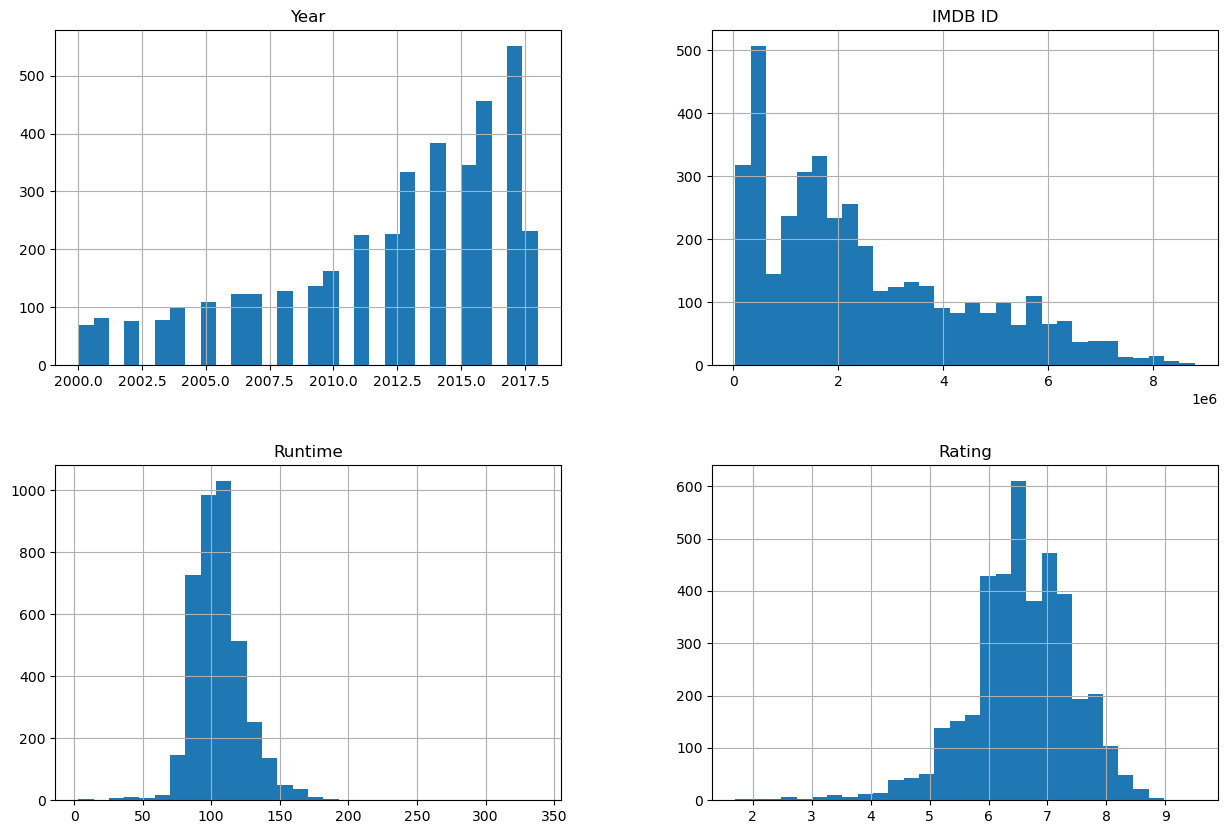

In [26]:
# Histograms for numeric columns

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(bins=30, figsize=(15, 10))
plt.show()

<ins>Analysis of Historgrams:</ins> 
- Year does not have a normal distribution. Data is skewed to the right (positively skewed distribution), meaning we have much more data from the years 2012-2017 than from 2000-2010.
- IMDB ID also does not have a normal distribution. Data is skewed to the left (negatively skewed distribution), however that is irrelevant since we wouldn't do specific analysis on the numerical values of IMDB ID.
- Runtime and Rating are closer to a normal distribution but somewhat skewed

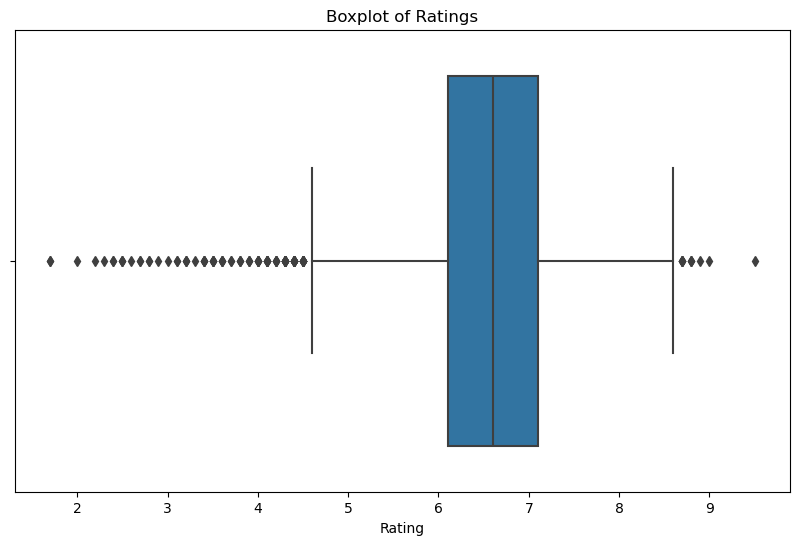

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Rating'])
plt.title('Boxplot of Ratings')
plt.xlabel('Rating')
plt.show()

<ins>Analysis of Boxplots:</ins> 
- Year does not have a normal distribution. Data is skewed to the right (positively skewed distribution)
- IMDB ID also does not have a normal distribution. Data is skewed to the left (negatively skewed distribution)
- Runtime and Rating are closer to a normal distribution, but somewhat skewed

**Pair Plot Analysis**

C:\Users\knick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\knick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\knick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\knick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

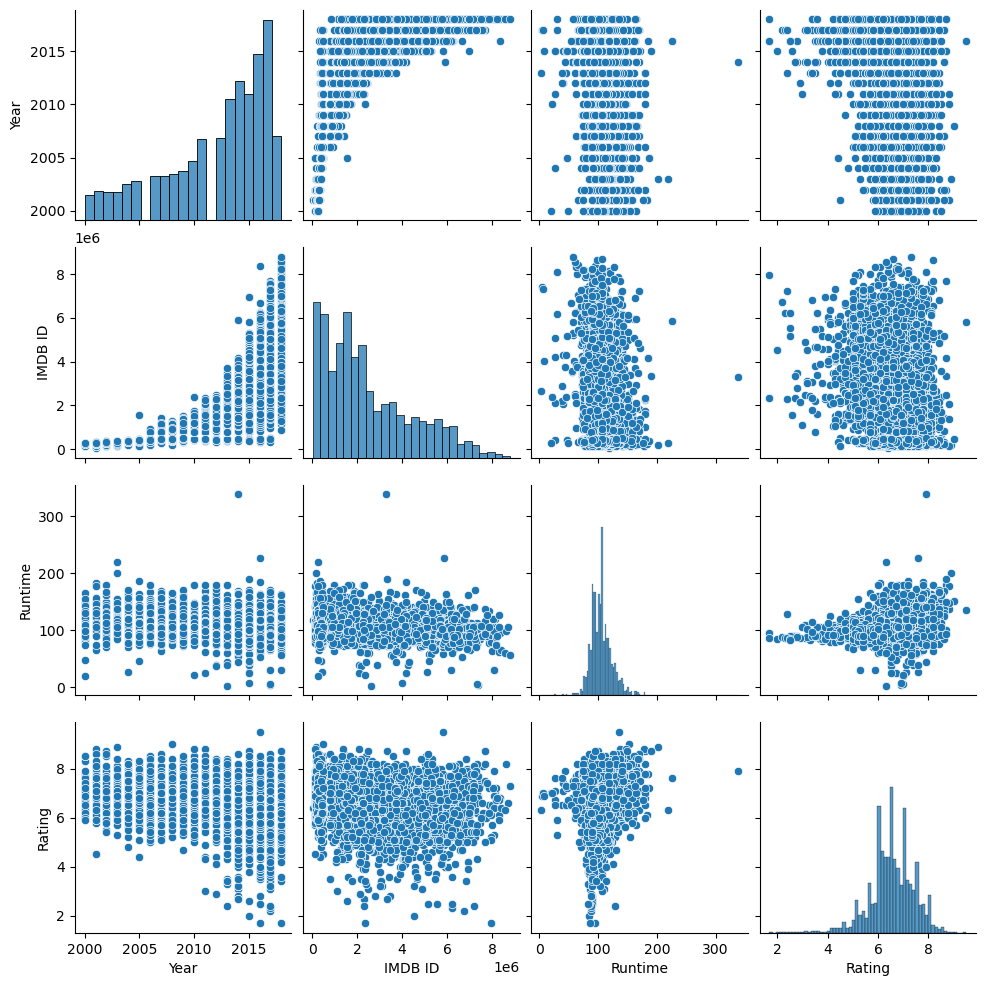

In [36]:
# Pair plot for the dataset
sns.pairplot(df)
plt.show()

<ins>Analysis of Pair Plot:</ins> 
- Rating vs. Year: No clear pattern, rating is spread pretty uniformly accross the years.
- Runtime vs. Rating: Observation: movies with runtime of around 100 minutes have a quite a range of rating; other runtimes have less of a range in rating.
- Additionally:  
&nbsp;- Year: We see again that there are more movies in our dataset from the later years than the earlier years  
&nbsp;- Rating: Majority of ratings fall between the 6-8 range, indicating more positive ratings the less positive ones  
&nbsp;- Runtime: The majority of movies in our dataset have a runtime of approximately 100-120 minutes

**Correlation Analysis**

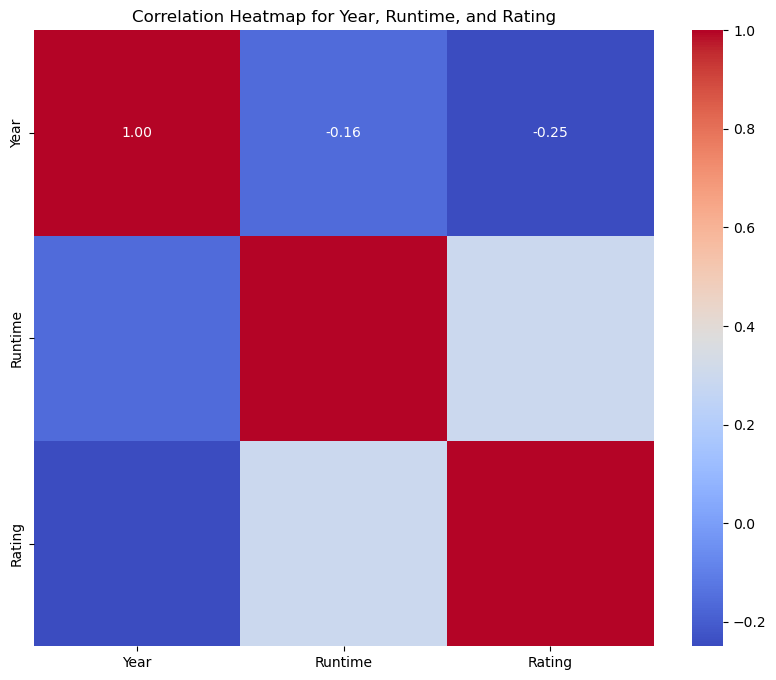

In [37]:
# Select only the columns of interest
selected_columns = ['Year', 'Runtime', 'Rating']
df_selected = df[selected_columns]

# Calculate the correlation matrix
corr = df_selected.corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Year, Runtime, and Rating')
plt.show()

<ins>Correlation Analysis (Heatmap):</ins> 
- Rating and Year: Fairly negative correlation (-0.25) which indicates that older movie's, tend to have slightly higher ratings
- Runtime vs. Rating: This heatmap doesn't really show any relationship between Runtime and Rating.